In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("dataset.csv", index_col="DATE")
data.index = pd.to_datetime(data.index)
data["DOTY"] = data.index.day_of_year
data["Year"] = data.index.year
metrics = data[["Year","DOTY","AWND","PRCP","SNOW","SNWD","TMAX","TMIN","WDF2","WSF2"]].copy()
labels = data[["Year","WT01","WT02","WT03","WT04","WT05","WT06","WT07","WT08","WT09","WT10","WT11","WT13","WT14","WT15","WT16","WT17","WT18","WT19","WT21","WT22"]].copy()
labels = labels.fillna(0)

In [114]:
import torch
from processing import *

x_train, x_val, x_test = generate_features()

ValueError: not enough values to unpack (expected 3, got 2)

In [3]:
types_dictionary = {
    "WT01" : "Fog",
    "WT02" : "Heavy Fog",
    "WT03" : "Thunder",
    "WT04" : "Small Hail",
    "WT05" : "Hail",
    "WT06" : "Glaze or Rime",
    "WT07" : "Blowing Dust",
    "WT08" : "Smoke or Haze",
    "WT09" : "Blowing Snow",
    "WT10" : "Tornado",
    "WT11" : "Damaging Winds",
    "WT13" : "Mist",
    "WT14" : "Drizzle",
    "WT15" : "Freezing Drizzle",
    "WT16" : "Rain",
    "WT17" : "Freezing Rain",
    "WT18" : "Snow",
    "WT19" : "Unknown Precipitation",
    "WT21" : "Ground Fog",
    "WT22" : "Freezing Fog"
}

In [25]:
#data.loc['2023-10-01':'2023-10-31',:]
data.apply(pd.isnull).sum() / data.shape[0]
metrics.apply(pd.isnull).sum() / metrics.shape[0]
#core_data.apply(pd.isnull).sum() / core_data.shape[0]
#metrics[pd.isnull(metrics['WDF2'])]
#np.mean(data['WDF2'])
#metrics.loc['2000-08-25':'2000-09-05',:]
#metrics.index.day
#labels
#data.apply(lambda x : (x==9999).sum())
metrics = metrics[metrics['DOTY'] != 366]
metrics['2020-12-30':'2021-01-05']
#metrics.shape[1]

,Year,DOTY,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WSF2
DATE,,,,,,,,,,
2020-12-30,2020,365,6.4,4.3,5.0,30.0,6.1,-2.1,220.0,12.5
2021-01-01,2021,1,3.7,7.6,3.0,0.0,0.6,-5.5,60.0,8.9
2021-01-02,2021,2,2.3,0.8,0.0,0.0,1.7,0.0,120.0,4.0
2021-01-03,2021,3,1.8,4.1,33.0,30.0,1.7,0.0,250.0,5.4
2021-01-04,2021,4,3.2,0.0,0.0,0.0,1.1,-0.5,220.0,6.3
2021-01-05,2021,5,2.0,0.0,0.0,0.0,1.1,-1.0,320.0,5.4


In [102]:
types = labels.rename(columns=types_dictionary)
types.sum()

Fog                      4253.0
Heavy Fog                 409.0
Thunder                   801.0
Small Hail                129.0
Hail                      364.0
Glaze or Rime             127.0
Blowing Dust              266.0
Smoke or Haze            2975.0
Blowing Snow              144.0
Tornado                     2.0
Damaging Winds             18.0
Mist                     2296.0
Drizzle                   146.0
Freezing Drizzle           30.0
Rain                     2082.0
Freezing Rain              50.0
Snow                      935.0
Unknown Precipitation      38.0
Ground Fog                 87.0
Freezing Fog               96.0
dtype: float64

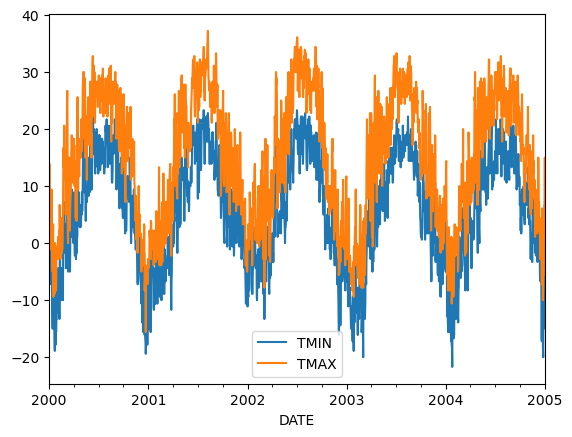

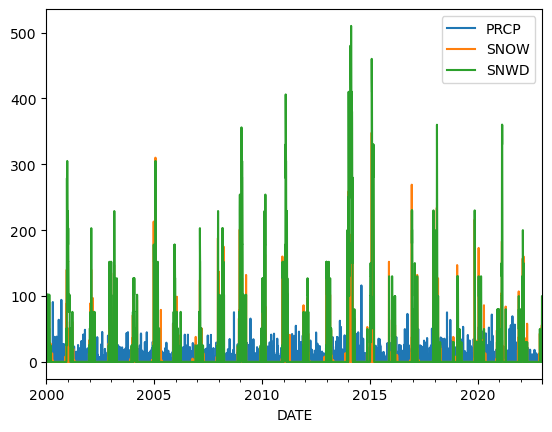

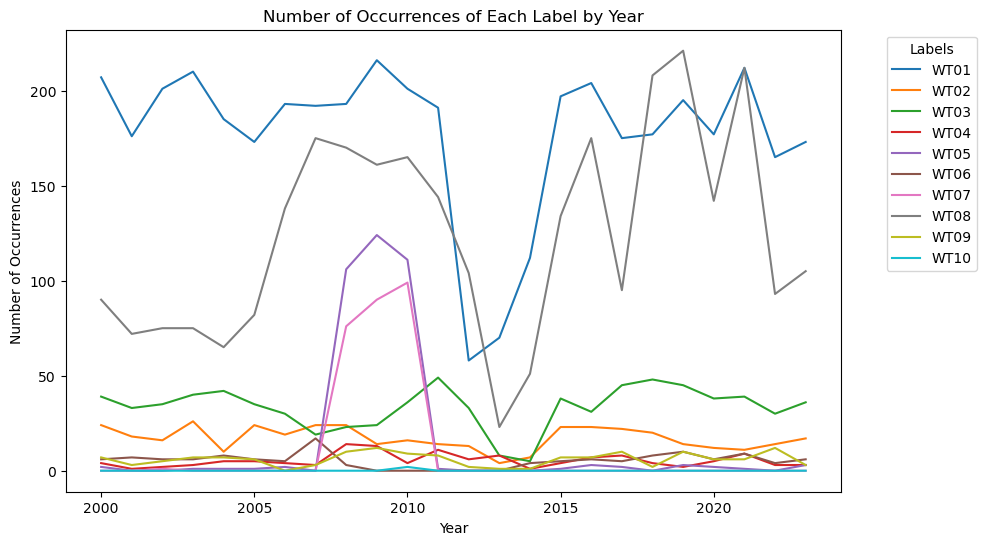

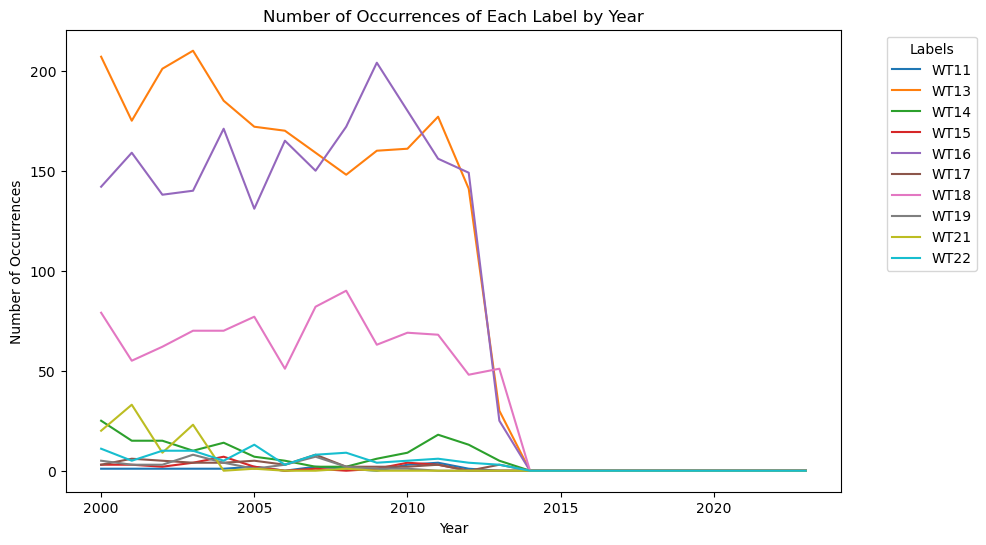

In [16]:
metrics['2000-01-01':'2005-01-01'][['TMIN','TMAX']].plot()
metrics['2000-01-01':'2023-01-01'][['PRCP','SNOW','SNWD']].plot()
label_counts_by_year_0 = labels.groupby("Year")[["WT01","WT02","WT03","WT04","WT05","WT06","WT07","WT08","WT09","WT10"]].sum()
label_counts_by_year_1 = labels.groupby("Year")[["WT11","WT13","WT14","WT15","WT16","WT17","WT18","WT19","WT21","WT22"]].sum()
label_counts_by_year_0.plot(figsize=(10, 6))
plt.title('Number of Occurrences of Each Label by Year')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend(title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
label_counts_by_year_1.plot(figsize=(10, 6))
plt.title('Number of Occurrences of Each Label by Year')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend(title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()